              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5918
         1.0       0.98      0.96      0.97      5964

    accuracy                           0.97     11882
   macro avg       0.97      0.97      0.97     11882
weighted avg       0.97      0.97      0.97     11882

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5918
         1.0       1.00      1.00      1.00      5964

    accuracy                           1.00     11882
   macro avg       1.00      1.00      1.00     11882
weighted avg       1.00      1.00      1.00     11882



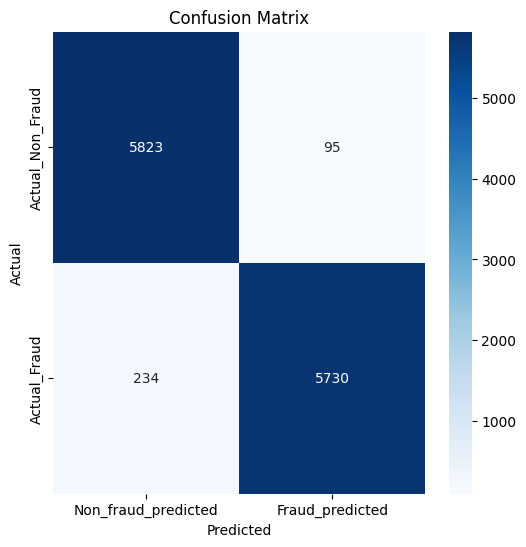

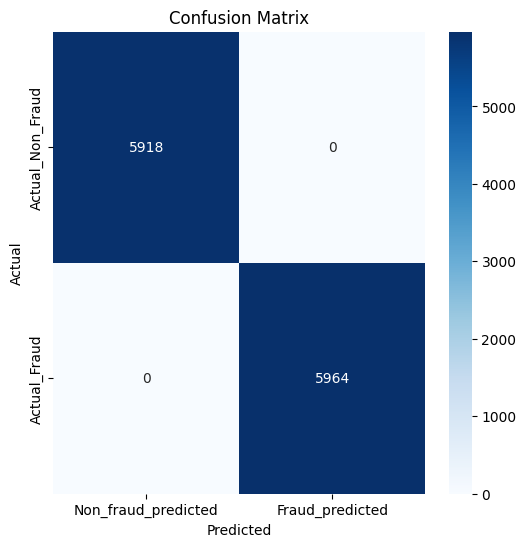

In [6]:
from model import log_model

In [14]:
from model import x_test,y_test
import numpy as np
import pandas as pd

In [13]:
test_data = np.array(x_test)
test_data_df = pd.DataFrame(test_data)
test_data_df.to_json("testdata.json",orient="records")

In [16]:
test_target = np.array(y_test)
test_target_df = pd.DataFrame(test_target)
test_target_df.to_json("testtarget.json",orient="records")

In [7]:
import joblib

In [8]:

joblib.dump(log_model, 'model.pkl')

['model.pkl']

In [9]:
model = joblib.load('model.pkl')

In [10]:
from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI()

# Load the trained model
model = joblib.load('model.pkl')

@app.post("/predict/")
async def predict(data: list):
    data = np.array(data)
    prediction = model.predict(data)
    return {"prediction": prediction.tolist()}
